# Import Library

### In this study, we will use the two data sets that we carry out our studies together.


### The big data set will be our train set. Our small dataset will be our test set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
columnname = pd.read_excel("Data_Uci/features.xlsx")
column = columnname["degiskenismi"]

### *Uploading small data*

In [3]:
small_x_train = pd.read_excel("Data_Uci/final_x_train.xlsx", names = column)
small_x_test = pd.read_excel("Data_Uci/final_x_test.xlsx", names = column)

In [4]:
small_y_train = pd.read_excel("Data_Uci/final_y_train.xlsx", names = ["activity"]) -1
small_y_test = pd.read_excel("Data_Uci/final_y_test.xlsx", names = ["activity"]) -1

### Uploading big data

In [5]:
big_x_train = pd.read_excel("UCI HAR Dataset/Dataset/x_train.xlsx", names = column)
big_x_test = pd.read_excel("UCI HAR Dataset/Dataset/x_test.xlsx", names = column)

In [6]:
big_y_train = pd.read_excel("UCI HAR Dataset/Dataset/y_train.xlsx", names = ["activity"]) -1
big_y_test = pd.read_excel("UCI HAR Dataset/Dataset/y_test.xlsx", names = ["activity"]) -1

In [7]:
from pandasql import sqldf

In [9]:
print(sqldf("select * from big_x_train limit 5;"))

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

## CONCAT X_TRAIN

In [10]:
print(sqldf("select count(*) from big_x_train;"))

   count(*)
0      7351


In [11]:
print(sqldf("select count(*) from small_x_train;"))

   count(*)
0      4251


In [12]:
new_x_train = pd.concat([big_x_train,small_x_train])

In [13]:
print(sqldf("select count(*) from new_x_train;"))

   count(*)
0     11602


## CONCAT Y_TRAIN

In [14]:
print(sqldf("select count(*) from big_y_train;"))

   count(*)
0      7351


In [15]:
print(sqldf("select count(*) from small_y_train;"))

   count(*)
0      4251


In [16]:
new_y_train = pd.concat([big_y_train,small_y_train])

In [17]:
print(sqldf("select count(*) from new_y_train;"))

   count(*)
0     11602


## CONCAT X_TEST

In [18]:
print(sqldf("select count(*) from small_x_test"))

   count(*)
0      1491


In [19]:
print(sqldf("select count(*) from big_x_test"))

   count(*)
0      2946


In [20]:
new_x_test = pd.concat([big_x_test,small_x_test])

In [21]:
print(sqldf("select count(*) from new_x_test;"))

   count(*)
0      4437


## CONCAT Y_TEST

In [22]:
print(sqldf("select count(*) from small_y_test"))

   count(*)
0      1491


In [23]:
print(sqldf("select count(*) from big_y_test"))

   count(*)
0      2946


In [24]:
new_y_test = pd.concat([big_y_test,small_y_test])

In [25]:
print(sqldf("select count(*) from new_y_test;"))

   count(*)
0      4437


In [26]:
new_x_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [27]:
new_x_train.shape, new_x_test.shape , new_y_train.shape , new_y_test.shape

((11602, 561), (4437, 561), (11602, 1), (4437, 1))

# *TWO CLASS MODELS*

In [28]:
pd.DataFrame(new_y_train.value_counts())

,0
activity,
4,2148
3,2120
0,1994
5,1961
1,1702
2,1677


In [ ]:
### ACTIVITY LABELS ###

#0 WALKING              -> 1
#1 WALKING_UPSTAIRS     -> 1
#2 WALKING_DOWNSTAIRS   -> 1
#3 SITTING              -> 0
#4 STANDING             -> 0
#5 LAYING               -> 0

In [30]:
## MOVING ACTIVIES
new_y_train = new_y_train.replace(0,1)
new_y_train = new_y_train.replace(1,1)
new_y_train = new_y_train.replace(2,1)

new_y_test = new_y_test.replace(0,1)
new_y_test = new_y_test.replace(1,1)
new_y_test = new_y_test.replace(2,1)


## STATIONARY ACTIVITIES
new_y_train = new_y_train.replace(3,0)
new_y_train = new_y_train.replace(4,0)
new_y_train = new_y_train.replace(5,0)

new_y_test = new_y_test.replace(3,0)
new_y_test = new_y_test.replace(4,0)
new_y_test = new_y_test.replace(5,0)

## Two Class Models With 'Gyroscope'

In [31]:
x_train_copy = new_x_train.copy()
x_test_copy = new_x_test.copy()

In [32]:
for var_name in x_train_copy.columns:
    if 'Acc' in var_name:
        del x_train_copy[var_name]

In [33]:
for var_name in x_test_copy.columns:
    if 'Acc' in var_name:
        del x_test_copy[var_name]

In [79]:
x_train_copy.shape , x_test_copy.shape

((11602, 216), (4437, 216))

In [80]:
new_y_train.shape, new_y_test.shape

((11602, 1), (4437, 1))

In [81]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy, x_test_copy, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:26<00:00,  2.99s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.33
BaggingClassifier,1.00,1.00,None,1.00,0.70
BernoulliNB,1.00,1.00,None,1.00,0.41
DecisionTreeClassifier,1.00,1.00,None,1.00,0.31
DummyClassifier,1.00,1.00,None,1.00,0.23
ExtraTreeClassifier,1.00,1.00,None,1.00,0.31
ExtraTreesClassifier,1.00,1.00,None,1.00,0.52
GaussianNB,1.00,1.00,None,1.00,0.35
KNeighborsClassifier,1.00,1.00,None,1.00,7.63


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [75]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train_copy.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_copy, new_y_train, batch_size = 32, epochs= 150,validation_data = (x_test_copy,new_y_test))

Epoch 1/150
363/363 [==============================] - 3s 5ms/step - loss: 0.0677 - accuracy: 0.9955 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.9098e-04 - val_accuracy: 1.0000
Epoch 3/150
363/363 [==============================] - 1s 4ms/step - loss: 8.7679e-04 - accuracy: 1.0000 - val_loss: 4.3865e-04 - val_accuracy: 1.0000
Epoch 4/150
363/363 [==============================] - 1s 4ms/step - loss: 4.4385e-04 - accuracy: 1.0000 - val_loss: 2.4767e-04 - val_accuracy: 1.0000
Epoch 5/150
363/363 [==============================] - 2s 4ms/step - loss: 2.6610e-04 - accuracy: 1.0000 - val_loss: 1.5947e-04 - val_accuracy: 1.0000
Epoch 6/150
363/363 [==============================] - 2s 4ms/step - loss: 1.8499e-04 - accuracy: 1.0000 - val_loss: 1.0921e-04 - val_accuracy: 1.0000
Epoch 7/150
363/363 [==============================] - 2s 6ms/step - loss: 1.2482e-04 - accuracy: 1.0000 -

363/363 [==============================] - 2s 4ms/step - loss: 9.0830e-09 - accuracy: 1.0000 - val_loss: 2.6867e-10 - val_accuracy: 1.0000
Epoch 56/150
363/363 [==============================] - 1s 4ms/step - loss: 4.3566e-09 - accuracy: 1.0000 - val_loss: 2.4180e-10 - val_accuracy: 1.0000
Epoch 57/150
363/363 [==============================] - 1s 4ms/step - loss: 6.4115e-09 - accuracy: 1.0000 - val_loss: 1.8807e-10 - val_accuracy: 1.0000
Epoch 58/150
363/363 [==============================] - 1s 3ms/step - loss: 2.3324e-09 - accuracy: 1.0000 - val_loss: 1.8807e-10 - val_accuracy: 1.0000
Epoch 59/150
363/363 [==============================] - 1s 4ms/step - loss: 2.5379e-09 - accuracy: 1.0000 - val_loss: 1.6120e-10 - val_accuracy: 1.0000
Epoch 60/150
363/363 [==============================] - 1s 4ms/step - loss: 2.2810e-09 - accuracy: 1.0000 - val_loss: 1.3434e-10 - val_accuracy: 1.0000
Epoch 61/150
363/363 [==============================] - 1s 4ms/step - loss: 9.7611e-10 - accuracy: 1.

Epoch 109/150
363/363 [==============================] - 1s 3ms/step - loss: 7.1924e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 110/150
363/363 [==============================] - 1s 3ms/step - loss: 3.0825e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 111/150
363/363 [==============================] - 1s 4ms/step - loss: 9.2474e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 112/150
363/363 [==============================] - 1s 4ms/step - loss: 1.0275e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 113/150
363/363 [==============================] - 1s 4ms/step - loss: 2.0550e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 114/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 115/150
363/363 [==============================] - 1s 4ms/step - loss: 0.000

In [76]:
_, accuracy = model.evaluate(x_test_copy,new_y_test)

139/139 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


## Two Class Models With 'Acceleremater'

In [83]:
x_train_copy_2 = new_x_train.copy()
x_test_copy_2 = new_x_test.copy()

In [84]:
for var_name in x_train_copy_2.columns:
    if 'Gyro' in var_name:
        del x_train_copy_2[var_name]

In [85]:
for var_name in x_test_copy_2.columns:
    if 'Gyro' in var_name:
        del x_test_copy_2[var_name]

In [86]:
x_train_copy_2.shape,x_test_copy_2.shape

((11602, 348), (4437, 348))

In [87]:
new_y_train.shape, new_y_test.shape

((11602, 1), (4437, 1))

In [88]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy_2, x_test_copy_2, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:52<00:00,  1.82s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.39
BaggingClassifier,1.00,1.00,None,1.00,0.78
BernoulliNB,1.00,1.00,None,1.00,0.42
DecisionTreeClassifier,1.00,1.00,None,1.00,0.32
DummyClassifier,1.00,1.00,None,1.00,0.29
ExtraTreeClassifier,1.00,1.00,None,1.00,0.30
ExtraTreesClassifier,1.00,1.00,None,1.00,0.53
GaussianNB,1.00,1.00,None,1.00,0.39
KNeighborsClassifier,1.00,1.00,None,1.00,2.35


In [90]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train_copy_2.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_copy_2, new_y_train, batch_size = 32, epochs= 150,validation_data = (x_test_copy_2,new_y_test))

Epoch 1/150
363/363 [==============================] - 3s 4ms/step - loss: 0.0792 - accuracy: 0.9949 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3930e-04 - val_accuracy: 1.0000
Epoch 3/150
363/363 [==============================] - 1s 3ms/step - loss: 8.5615e-04 - accuracy: 1.0000 - val_loss: 4.5795e-04 - val_accuracy: 1.0000
Epoch 4/150
363/363 [==============================] - 1s 4ms/step - loss: 4.7325e-04 - accuracy: 1.0000 - val_loss: 2.6878e-04 - val_accuracy: 1.0000
Epoch 5/150
363/363 [==============================] - 1s 3ms/step - loss: 2.9896e-04 - accuracy: 1.0000 - val_loss: 1.7402e-04 - val_accuracy: 1.0000
Epoch 6/150
363/363 [==============================] - 1s 3ms/step - loss: 2.0488e-04 - accuracy: 1.0000 - val_loss: 1.1732e-04 - val_accuracy: 1.0000
Epoch 7/150
363/363 [==============================] - 1s 4ms/step - loss: 1.4190e-04 - accuracy: 1.0000 -

363/363 [==============================] - 2s 5ms/step - loss: 6.6787e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 56/150
363/363 [==============================] - 1s 4ms/step - loss: 6.0827e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/150
363/363 [==============================] - 1s 4ms/step - loss: 4.3052e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/150
363/363 [==============================] - 2s 5ms/step - loss: 3.8223e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/150
363/363 [==============================] - 2s 6ms/step - loss: 3.0003e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/150
363/363 [==============================] - 1s 4ms/step - loss: 2.8153e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/150
363/363 [==============================] - 1s 4ms/step - loss: 1.9933e-09 - accuracy: 1.

Epoch 109/150
363/363 [==============================] - 1s 3ms/step - loss: 1.1302e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 110/150
363/363 [==============================] - 1s 3ms/step - loss: 2.0550e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 111/150
363/363 [==============================] - 1s 3ms/step - loss: 5.1374e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 112/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 113/150
363/363 [==============================] - 1s 3ms/step - loss: 3.0825e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 114/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 115/150
363/363 [==============================] - 1s 3ms/step - loss: 0.000

In [91]:
_, accuracy = model.evaluate(x_test_copy_2,new_y_test)

139/139 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


## Two Class Models With Both Sensors 'Acceleremater' and 'Gyroscope'

In [92]:
new_x_train.shape, new_x_test.shape , new_y_train.shape , new_y_test.shape

((11602, 561), (4437, 561), (11602, 1), (4437, 1))

In [93]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(new_x_train, new_x_test, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:03<00:00,  2.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.73
BaggingClassifier,1.00,1.00,None,1.00,1.34
BernoulliNB,1.00,1.00,None,1.00,0.70
DecisionTreeClassifier,1.00,1.00,None,1.00,0.50
DummyClassifier,1.00,1.00,None,1.00,0.45
ExtraTreeClassifier,1.00,1.00,None,1.00,0.50
ExtraTreesClassifier,1.00,1.00,None,1.00,0.68
GaussianNB,1.00,1.00,None,1.00,0.62
KNeighborsClassifier,1.00,1.00,None,1.00,2.75


In [94]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=new_x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(new_x_train, new_y_train, batch_size = 32, epochs= 150,validation_data = (new_x_test,new_y_test))

Epoch 1/150
363/363 [==============================] - 3s 5ms/step - loss: 0.0931 - accuracy: 0.9922 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/150
363/363 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/150
363/363 [==============================] - 1s 4ms/step - loss: 9.7766e-04 - accuracy: 1.0000 - val_loss: 5.1388e-04 - val_accuracy: 1.0000
Epoch 4/150
363/363 [==============================] - 2s 6ms/step - loss: 5.3242e-04 - accuracy: 1.0000 - val_loss: 2.9679e-04 - val_accuracy: 1.0000
Epoch 5/150
363/363 [==============================] - 2s 4ms/step - loss: 3.2764e-04 - accuracy: 1.0000 - val_loss: 1.8838e-04 - val_accuracy: 1.0000
Epoch 6/150
363/363 [==============================] - 3s 7ms/step - loss: 2.1799e-04 - accuracy: 1.0000 - val_loss: 1.2635e-04 - val_accuracy: 1.0000
Epoch 7/150
363/363 [==============================] - 2s 6ms/step - loss: 1.5655e-04 - accuracy: 1.0000 - val

363/363 [==============================] - 1s 4ms/step - loss: 9.2063e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 56/150
363/363 [==============================] - 1s 4ms/step - loss: 8.0144e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/150
363/363 [==============================] - 1s 3ms/step - loss: 5.6512e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/150
363/363 [==============================] - 1s 3ms/step - loss: 4.4593e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/150
363/363 [==============================] - 1s 3ms/step - loss: 5.0141e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/150
363/363 [==============================] - 1s 3ms/step - loss: 2.8975e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/150
363/363 [==============================] - 1s 4ms/step - loss: 2.4146e-09 - accuracy: 1.

Epoch 109/150
363/363 [==============================] - 1s 3ms/step - loss: 5.1374e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 110/150
363/363 [==============================] - 1s 3ms/step - loss: 4.1100e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 111/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 112/150
363/363 [==============================] - 1s 3ms/step - loss: 7.1924e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 113/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 114/150
363/363 [==============================] - 1s 3ms/step - loss: 2.0550e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 115/150
363/363 [==============================] - 1s 3ms/step - loss: 1.952

In [95]:
_, accuracy = model.evaluate(new_x_test,new_y_test)

139/139 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


# MULTI CLASS

### CONCATING AGAIN

In [96]:
new_x_train = pd.concat([big_x_train,small_x_train])
new_x_test = pd.concat([big_x_test,small_x_test])
new_y_test = pd.concat([big_y_test,small_y_test])
new_y_train = pd.concat([big_y_train,small_y_train])

## Multi Class Models With 'Gyroscope'

In [97]:
x_train_copy = new_x_train.copy()
x_test_copy = new_x_test.copy()

In [98]:
for var_name in x_train_copy.columns:
    if 'Acc' in var_name:
        del x_train_copy[var_name]

In [99]:
for var_name in x_test_copy.columns:
    if 'Acc' in var_name:
        del x_test_copy[var_name]

In [100]:
x_train_copy.shape , x_test_copy.shape

((11602, 216), (4437, 216))

In [101]:
new_y_train.shape, new_y_test.shape

((11602, 1), (4437, 1))

In [105]:
pd.DataFrame(new_y_train.value_counts())

,0
activity,
4,2148
3,2120
0,1994
5,1961
1,1702
2,1677


In [106]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy, x_test_copy, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [08:16<00:00, 17.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.88,0.88,None,0.88,18.97
XGBClassifier,0.88,0.87,None,0.88,132.05
LGBMClassifier,0.86,0.86,None,0.86,25.28
SVC,0.85,0.85,None,0.85,20.58
ExtraTreesClassifier,0.85,0.85,None,0.85,4.54
CalibratedClassifierCV,0.85,0.84,None,0.85,71.96
LinearSVC,0.85,0.84,None,0.85,21.17
LogisticRegression,0.84,0.84,None,0.84,2.10
LinearDiscriminantAnalysis,0.84,0.84,None,0.84,1.89


## Multi Class Models With 'Acceleremater'

In [107]:
x_train_copy_2 = new_x_train.copy()
x_test_copy_2 = new_x_test.copy()

In [108]:
for var_name in x_train_copy_2.columns:
    if 'Gyro' in var_name:
        del x_train_copy_2[var_name]

In [109]:
for var_name in x_test_copy_2.columns:
    if 'Gyro' in var_name:
        del x_test_copy_2[var_name]

In [110]:
x_train_copy_2.shape,x_test_copy_2.shape

((11602, 348), (4437, 348))

In [111]:
new_y_train.shape, new_y_test.shape

((11602, 1), (4437, 1))

In [112]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy_2, x_test_copy_2, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [10:43<00:00, 22.18s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.88,None,0.88,5.40
RandomForestClassifier,0.88,0.88,None,0.88,25.64
XGBClassifier,0.87,0.87,None,0.87,156.00
LinearSVC,0.87,0.87,None,0.87,30.12
LogisticRegression,0.87,0.87,None,0.87,3.15
CalibratedClassifierCV,0.86,0.87,None,0.86,102.07
LinearDiscriminantAnalysis,0.86,0.86,None,0.86,2.17
SVC,0.86,0.86,None,0.86,23.30
LGBMClassifier,0.86,0.86,None,0.86,32.00


## Two Class Models With Both Sensors 'Acceleremater' and 'Gyroscope'

In [113]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(new_x_train, new_x_test, new_y_train, new_y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [14:29<00:00, 29.97s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.94,0.93,None,0.94,223.22
LinearDiscriminantAnalysis,0.93,0.93,None,0.93,3.15
CalibratedClassifierCV,0.93,0.93,None,0.93,97.53
RidgeClassifierCV,0.93,0.93,None,0.93,2.05
RidgeClassifier,0.93,0.93,None,0.93,0.73
LGBMClassifier,0.92,0.92,None,0.92,52.99
LinearSVC,0.92,0.92,None,0.92,27.54
ExtraTreesClassifier,0.92,0.92,None,0.92,7.45
SVC,0.92,0.92,None,0.92,33.04


In [114]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=new_x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(new_x_train, new_y_train, batch_size = 32, epochs= 150,validation_data = (new_x_test,new_y_test))

Epoch 1/150
363/363 [==============================] - 3s 6ms/step - loss: 0.9623 - accuracy: 0.6565 - val_loss: 0.5994 - val_accuracy: 0.8134
Epoch 2/150
363/363 [==============================] - 2s 4ms/step - loss: 0.5058 - accuracy: 0.8321 - val_loss: 0.4066 - val_accuracy: 0.8715
Epoch 3/150
363/363 [==============================] - 1s 4ms/step - loss: 0.3901 - accuracy: 0.8668 - val_loss: 0.3432 - val_accuracy: 0.8781
Epoch 4/150
363/363 [==============================] - 1s 4ms/step - loss: 0.3329 - accuracy: 0.8836 - val_loss: 0.3159 - val_accuracy: 0.8864
Epoch 5/150
363/363 [==============================] - 2s 4ms/step - loss: 0.2996 - accuracy: 0.8901 - val_loss: 0.2845 - val_accuracy: 0.8975
Epoch 6/150
363/363 [==============================] - 2s 4ms/step - loss: 0.2693 - accuracy: 0.9008 - val_loss: 0.3106 - val_accuracy: 0.8758
Epoch 7/150
363/363 [==============================] - 1s 4ms/step - loss: 0.2551 - accuracy: 0.9054 - val_loss: 0.2619 - val_accuracy: 0.9013

Epoch 58/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0740 - accuracy: 0.9719 - val_loss: 0.2445 - val_accuracy: 0.9333
Epoch 59/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9727 - val_loss: 0.2430 - val_accuracy: 0.9216
Epoch 60/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9743 - val_loss: 0.2267 - val_accuracy: 0.9243
Epoch 61/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9750 - val_loss: 0.2285 - val_accuracy: 0.9360
Epoch 62/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9726 - val_loss: 0.2239 - val_accuracy: 0.9362
Epoch 63/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9721 - val_loss: 0.2280 - val_accuracy: 0.9299
Epoch 64/150
363/363 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9722 - val_loss: 0.2242 - val_accuracy:

Epoch 115/150
363/363 [==============================] - 2s 6ms/step - loss: 0.0412 - accuracy: 0.9861 - val_loss: 0.2591 - val_accuracy: 0.9317
Epoch 116/150
363/363 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9838 - val_loss: 0.2679 - val_accuracy: 0.9328
Epoch 117/150
363/363 [==============================] - 2s 4ms/step - loss: 0.0449 - accuracy: 0.9835 - val_loss: 0.2957 - val_accuracy: 0.9331
Epoch 118/150
363/363 [==============================] - 2s 4ms/step - loss: 0.0384 - accuracy: 0.9866 - val_loss: 0.2830 - val_accuracy: 0.9340
Epoch 119/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0391 - accuracy: 0.9857 - val_loss: 0.2823 - val_accuracy: 0.9324
Epoch 120/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9852 - val_loss: 0.2767 - val_accuracy: 0.9326
Epoch 121/150
363/363 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.2729 - val_ac

In [115]:
_, accuracy = model.evaluate(new_x_test,new_y_test)

139/139 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.9238


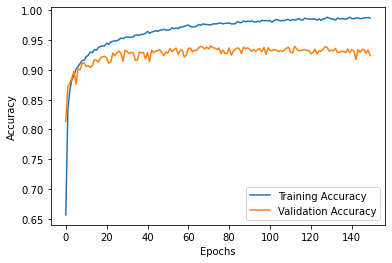

In [116]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()